In [1]:
%matplotlib inline

In [2]:
import stats_enriched_tweets
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from mpltools import style
import numpy as np

/Library/Python/2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


# build indexes

In [3]:
# 1. tweet index
tweetIndex = stats_enriched_tweets.createTweetIndex("/Users/muntean/refugees-output/Final2/refugees_all.json")
print len(tweetIndex)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1238724


In [4]:
# 2. masks over tweet index
dailyTweetsDict = stats_enriched_tweets.createDailyTweetsMask(tweetIndex)
print "Daily tweets - volumes:", len(dailyTweetsDict)
userCountryTweetsDict = stats_enriched_tweets.createUserCountryTweetsMask(tweetIndex)
print "User country tweets - volumes - EU:", len(userCountryTweetsDict)

Daily tweets - volumes: 40
User country tweets - volumes - EU: 51


# plot types

In [14]:
def plotBarWithLables(distrib, labels, title, rot=0):
    style.use('ggplot')
    plt.figure()
    ind = np.arange(len(distrib))
    plt.bar(ind, distrib, width = 0.75, align='center')
    plt.xticks(ind, labels, rotation=rot)
    plt.title(title)
    plt.ylabel('Volume')
    plt.tight_layout()
    plt.savefig("/Users/muntean/refugees-output/plots/" + title.replace(" ","_") + ".pdf")
    plt.show()

In [34]:
def plotBarWithLablesNew(distrib, labels, title, rot=0):
    style.use('ggplot')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ind = np.arange(len(distrib))
    ax.bar(ind, distrib, width = 0.75, align='center')
    plt.xticks(ind, labels, rotation=rot)
#     plt.legend(loc='upper left')
    plt.title(title)
    plt.ylabel('Volume')
    #plt.tight_layout()
    plt.savefig("/Users/muntean/refugees-output/plots/" + title.replace(" ","_") + ".pdf")
    plt.show()

In [ ]:
def plotBarWithLables2Distrib(a,b, labels, title, rot=0):

    #style.use('ggplot')
    ind = np.arange(len(a))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, a, width, color='r')
    rects2 = ax.bar(ind + width, b, width, color='b')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Frequencies')
    ax.set_title(title)
    ax.set_xticks(ind + width)
    ax.set_xticklabels(labels)

    plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right')

    # ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))
    #
    # def autolabel(rects):
    #     # attach some text labels
    #     for rect in rects:
    #         height = rect.get_height()
    #         ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
    #                 '%d' % int(height),
    #                 ha='center', va='bottom')
    #
    # autolabel(rects1)
    # autolabel(rects2)

    plt.show()


    # plt.tight_layout()
    # plt.savefig("/Users/muntean/refugees-output/plots/title + ".png")

# plots literally

#### tweets per day

In [36]:
def plotTweetsPerDay(tweetsPerDayDict):
    tweetsPerDay = [[len(y), x] for x, y in tweetsPerDayDict.items() if x is not None and len(y)>20000]
    #print tweetsPerDay
    tweetsPerDay.sort(key = lambda row: row[1])
    #print tweetsPerDay
    print "Tweets per day", len(tweetsPerDay)
    values = list(zip(*tweetsPerDay)[0])
    #print values
    labels = list(zip(*tweetsPerDay)[1])
    #print labels
    plotBarWithLablesNew(values, labels, "Number of tweets per day", rot=90)

Tweets per day 30


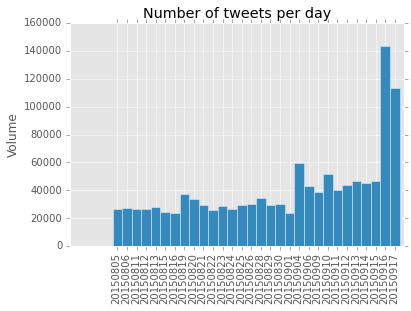

In [37]:
plotTweetsPerDay(dailyTweetsDict)

#### tweets per country

In [38]:
def plotTweetsPerCountry(tweetsPerCountryDict):
    """

    :param tweetsPerCountry: is a dictionary of key=country and values=list of tweets ids
    :return:
    """
    tweetsPerCountry = [[len(y), x] for x, y in tweetsPerCountryDict.items() if x is not None]
    tweetsPerCountry.sort(key = lambda row: row[0], reverse=True)
    values = list(zip(*tweetsPerCountry)[0])
    cummulative_values = np.cumsum(values)
    labels = list(zip(*tweetsPerCountry)[1])
    plotBarWithLablesNew(values, labels, "Number of tweets per country", rot=90)
    plotBarWithLablesNew(cummulative_values, labels, "Cummulative number of tweets per country", rot=90)

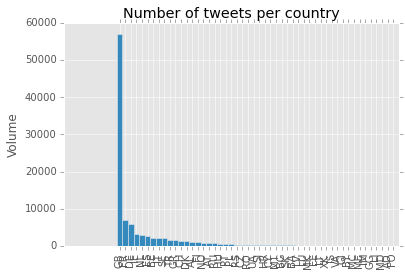

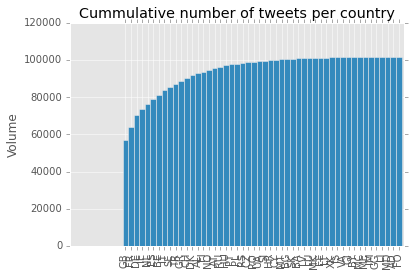

In [39]:
plotTweetsPerCountry(userCountryTweetsDict)